In [3]:
# Data Loading & Basic Inspection
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("wavesData_100k.csv")  # Replace with correct file path

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()


Dataset Shape: (100000, 9)

First 5 Rows:


,time,paw,flow,vol,pmus,pID,segment_id,global_segment_id,segment_range
0,50.02,8.372165,-0.027045,-0.007380,-0.099954,0,0,P0_S0,50.0-70.0s
1,50.10,8.317973,-0.023178,-0.008383,-0.097748,0,0,P0_S0,50.0-70.0s
2,50.18,8.393697,-0.023614,-0.009444,-0.089939,0,0,P0_S0,50.0-70.0s
3,50.26,8.330328,-0.026182,-0.010590,-0.077442,0,0,P0_S0,50.0-70.0s
4,50.34,8.419270,-0.018437,-0.011829,-0.061725,0,0,P0_S0,50.0-70.0s


In [4]:
print("\nData Info:")
buf = io.StringIO()
df.info(buf=buf)
info_str = buf.getvalue()
print(info_str)


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   time               100000 non-null  float64
 1   paw                100000 non-null  float64
 2   flow               100000 non-null  float64
 3   vol                100000 non-null  float64
 4   pmus               100000 non-null  float64
 5   pID                100000 non-null  int64  
 6   segment_id         100000 non-null  int64  
 7   global_segment_id  100000 non-null  object 
 8   segment_range      100000 non-null  object 
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB



In [5]:
df.describe()


,time,paw,flow,vol,pmus,pID,segment_id
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,86.520640,9.322667,-0.000448,0.107725,-0.818296,49.500000,1.50000
std,47.154092,3.137356,0.432459,0.169412,1.625069,28.866214,1.11804
min,0.780000,4.554619,-1.276017,-0.048776,-10.969374,0.000000,0.00000
25%,46.060000,7.597119,-0.105883,-0.001629,-0.684537,24.750000,0.75000
50%,89.030000,8.360931,-0.021687,0.026174,-0.081871,49.500000,1.50000
75%,123.630000,9.140014,0.005610,0.143502,-0.028711,74.250000,2.25000
max,209.520000,23.629859,1.493741,0.916692,-0.000000,99.000000,3.00000


## Analysis


Shapiro-Wilk Test Results (first 500 rows per column):
time: p-value = 3.7453e-26
paw: p-value = 6.2205e-30
flow: p-value = 1.9570e-24
vol: p-value = 3.4978e-26
pmus: p-value = 4.3272e-30
pID: p-value = 1.0000e+00
segment_id: p-value = 3.5517e-31


C:\Users\lamaA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


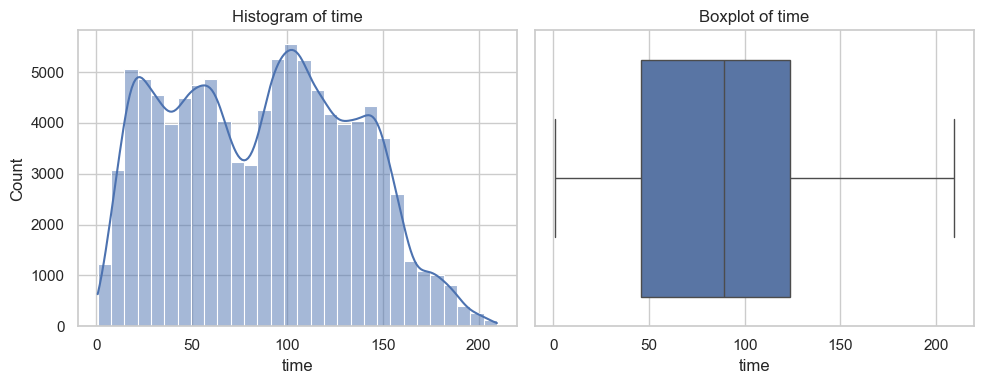

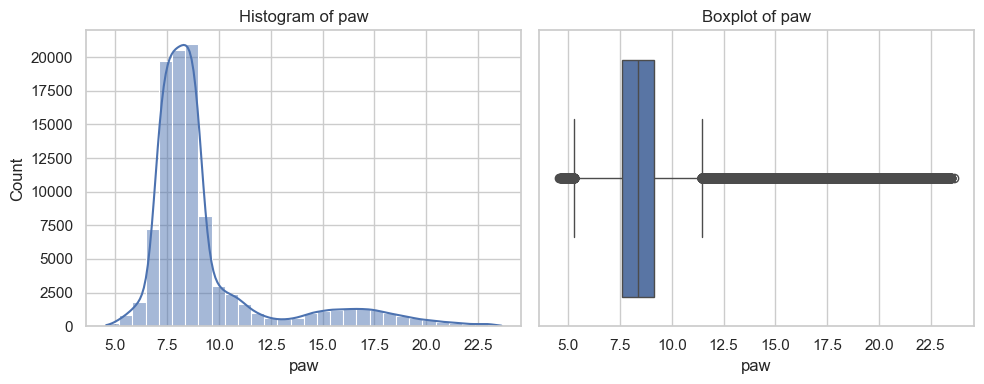

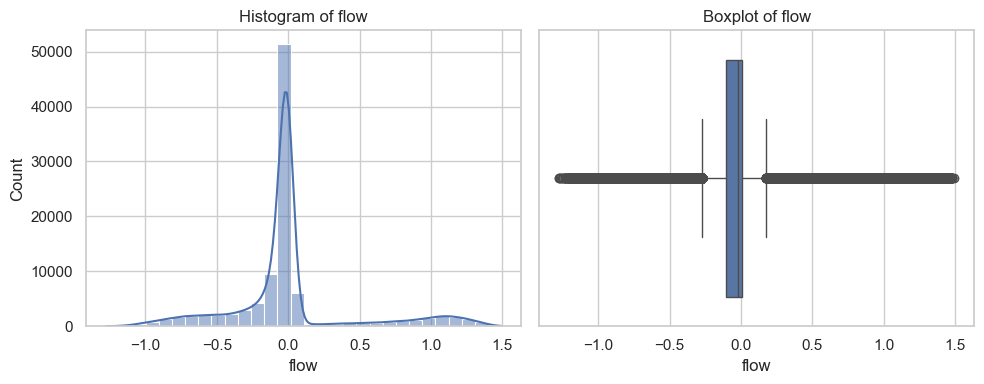

In [6]:
# Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

sns.set(style="whitegrid")

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nResults (first 500 rows per column):")
for col in numerical_cols:
    stat, p = shapiro(df[col].head(500))
    print(f"{col}: p-value = {p:.4e}")

def label_numeric_axis(col_name, data_series):
    if pd.api.types.is_numeric_dtype(data_series):
        if data_series.max() <= 1 and data_series.min() >= 0:
            return f"{col_name} (Scaled 0–1)"
        else:
            return col_name
    else:
        return col_name

# Histograms & Boxplots
for col in numerical_cols[:3]:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {col}')
    ax[0].set_xlabel(label_numeric_axis(col, df[col]))
    ax[0].set_ylabel("Count")

    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot of {col}')
    ax[1].set_xlabel(label_numeric_axis(col, df[col]))

    plt.tight_layout()
    plt.show()